In [16]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [17]:
! pip install -q kaggle


In [19]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (3).json


{'kaggle.json': b'{"username":"galilelbel","key":"eb0dad9682fbb77c0f6bcdb20438daa4"}'}

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d msheriey/104-flowers-garden-of-eden/jpeg-512x512/train/bird-of-paradise

104-flowers-garden-of-eden.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! kaggle datasets download -d alxmamaev/flowers-recognition

 93% 209M/225M [00:05<00:00, 25.7MB/s]
100% 225M/225M [00:05<00:00, 44.5MB/s]


In [ ]:
!unzip \*.zip

Streaming output truncated to the last 5000 lines.
  inflating: jpeg-512x512/train/wild pansy/3879.jpeg  
  inflating: jpeg-512x512/train/wild pansy/4414.jpeg  
  inflating: jpeg-512x512/train/wild pansy/4586.jpeg  
  inflating: jpeg-512x512/train/wild pansy/4591.jpeg  
  inflating: jpeg-512x512/train/wild pansy/4981.jpeg  
  inflating: jpeg-512x512/train/wild pansy/5036.jpeg  
  inflating: jpeg-512x512/train/wild pansy/5093.jpeg  
  inflating: jpeg-512x512/train/wild pansy/5099.jpeg  
  inflating: jpeg-512x512/train/wild pansy/515.jpeg  
  inflating: jpeg-512x512/train/wild pansy/5337.jpeg  
  inflating: jpeg-512x512/train/wild pansy/5510.jpeg  
  inflating: jpeg-512x512/train/wild pansy/5555.jpeg  
  inflating: jpeg-512x512/train/wild pansy/5631.jpeg  
  inflating: jpeg-512x512/train/wild pansy/5670.jpeg  
  inflating: jpeg-512x512/train/wild pansy/5751.jpeg  
  inflating: jpeg-512x512/train/wild pansy/5919.jpeg  
  inflating: jpeg-512x512/train/wild pansy/5931.jpeg  
  inflating: jp

In [20]:
categories=['dandelion', 'daisy', 'sunflower', 'tulip', 'rose', 'pink primrose', 'wild geranium', 'bougainvillea', 'fire lily', 'yellow iris']

In [21]:
dire='/content/flowers'

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
features=[]
for i in categories:
    path=os.path.join(dire,i)
    num_classes=categories.index(i)
    for img in os.listdir(path):
        if img.endswith('.jpg'):        
            img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_COLOR)
            img_array=cv2.resize(img_array,(150,150))
            features.append([img_array,num_classes])

        if img.endswith('.jpeg'):
            img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_COLOR)
            img_array=cv2.resize(img_array,(150,150))
            features.append([img_array,num_classes])


In [23]:
X=[]
y=[]
for i,j in features:
    X.append(i)
    y.append(j)

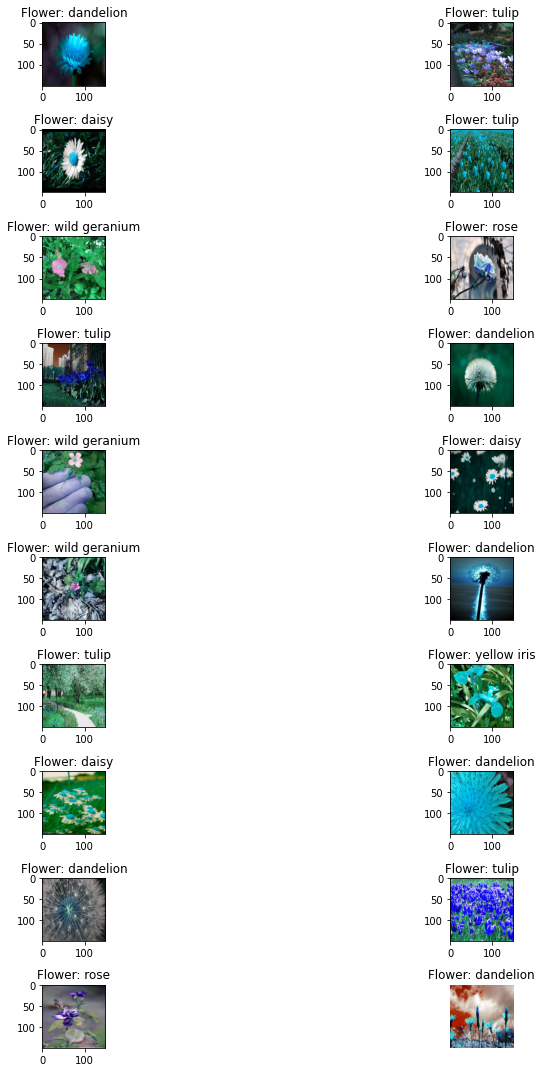

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
fig,ax=plt.subplots(10,2)
fig.set_size_inches(15,15)
for i in range(10):
    for j in range (2):
        l=np.random.randint(0,len(y))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Flower: '+categories[y[l]])
plt.axis('off')        
plt.tight_layout()

In [25]:
X=np.array(X).reshape(-1,150,150,3)/255.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


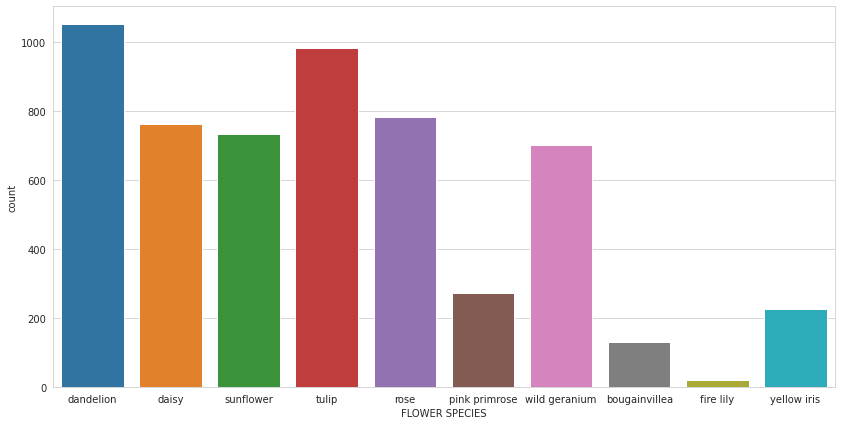

In [26]:
sns.set_style('whitegrid')
plt.figure(figsize=(14,7))
fig=sns.countplot(y)
fig.set(xticks=range(len(categories)), xticklabels=[i for i in categories])
plt.xlabel('FLOWER SPECIES')
plt.show()

In [27]:
list_dandelion=len([i for i in y if i==0])
list_daisy=len([i for i in y if i==1])
list_sunflower=len([i for i in y if i==2])
list_tulip=len([ i for i in y if i==3])
list_rose=len([i for i in y if i==4])
list_bird_of_paradise=len([i for i in y if i==5])
list_blackberry_lily=len([i for i in y if i==6])
list_bougainvillea=len([i for i in y if i==7])
list_fire_lily=len([i for i in y if i==8])
list_mexican_petunia=len([i for i in y if i==9])


In [28]:
list_species=[list_dandelion,list_daisy,list_sunflower,list_tulip,list_rose,list_bird_of_paradise,list_blackberry_lily,list_bougainvillea,list_fire_lily,list_mexican_petunia]

In [29]:
sns.set_style('whitegrid')
plt.figure(figsize=(18,10))
plt.pie(list_species,labels=categories,startangle=90,colors=['r','g','b','y','m','pink','purple','c','k','w'],autopct='%1.1f%%',explode = (0,0.1, 0, 0,0,0,0,0,0,0),shadow=True)
plt.legend()
plt.show()

In [30]:
from tensorflow.keras.utils import to_categorical
print(len(y));
y=to_categorical(y)
print(len(y));

5669
5669


In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=12)
print(len(x_train));
print(len(x_test));
print(len(y_train));
print(len(y_test));

4535
1134
4535
1134


In [32]:
!pip install matplotlib-venn

In [33]:
!apt-get -qq install -y libfluidsynth1

In [34]:
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

In [35]:
!apt-get -qq install -y graphviz && pip install pydot
import pydot

In [36]:
!pip install cartopy
import cartopy

In [37]:
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop

from tensorflow.keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [38]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(150,150,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2, padding="same"))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2, padding="same"))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2, padding="same"))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(10, activation="softmax"))

In [39]:
epochs=50

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [40]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

print(len(x_train));
datagen.fit(x_train)
print(len(x_train));

4535
4535


In [41]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 72, 72, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0

In [43]:
print('x_train', len(x_train));
print('y_train', len(y_train));
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=128),epochs = epochs, validation_data = (x_test,y_test),verbose = 1, steps_per_epoch=x_train.shape[0] // 128)

x_train 4535
y_train 4535


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
35/35 [==============================] - 58s 773ms/step - loss: 2.3309 - accuracy: 0.1833 - val_loss: 1.9274 - val_accuracy: 0.2928
Epoch 2/50
35/35 [==============================] - 27s 759ms/step - loss: 1.7245 - accuracy: 0.3399 - val_loss: 1.6298 - val_accuracy: 0.3907
Epoch 3/50
35/35 [==============================] - 26s 738ms/step - loss: 1.5663 - accuracy: 0.4044 - val_loss: 1.4330 - val_accuracy: 0.4991
Epoch 4/50
35/35 [==============================] - 27s 762ms/step - loss: 1.4562 - accuracy: 0.4536 - val_loss: 1.4040 - val_accuracy: 0.4894
Epoch 5/50
35/35 [==============================] - 26s 751ms/step - loss: 1.3826 - accuracy: 0.4915 - val_loss: 1.3041 - val_accuracy: 0.5617
Epoch 6/50
35/35 [==============================] - 26s 746ms/step - loss: 1.3356 - accuracy: 0.5037 - val_loss: 1.2390 - val_accuracy: 0.5908
Epoch 7/50
35/35 [==============================] - 27s 760ms/step - loss: 1.2683 - accuracy: 0.5271 - val_loss: 1.2070 - val_accuracy: 0.5952

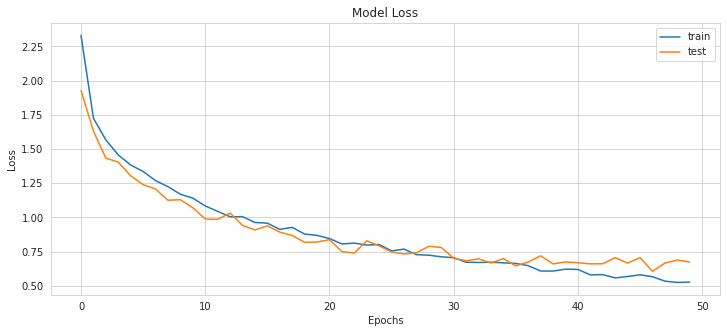

In [44]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,5))
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [45]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,5))
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [46]:
preds=model.predict(x_test)

In [47]:
predictions=np.argmax(preds,axis=1)

In [48]:
correct_class=[]
incorrect_class=[]
i=0
for i in range(len(y_test)):
    if(np.argmax(y_test[i])==predictions[i]):
        correct_class.append(i)
    if(len(correct_class)==8):
        break

In [49]:
i=0
for i in range(len(y_test)):
    
    if (np.argmax(y_test[i])!=predictions[i]):
        
        incorrect_class.append(i)
    if (len(incorrect_class)==8):
        break
        

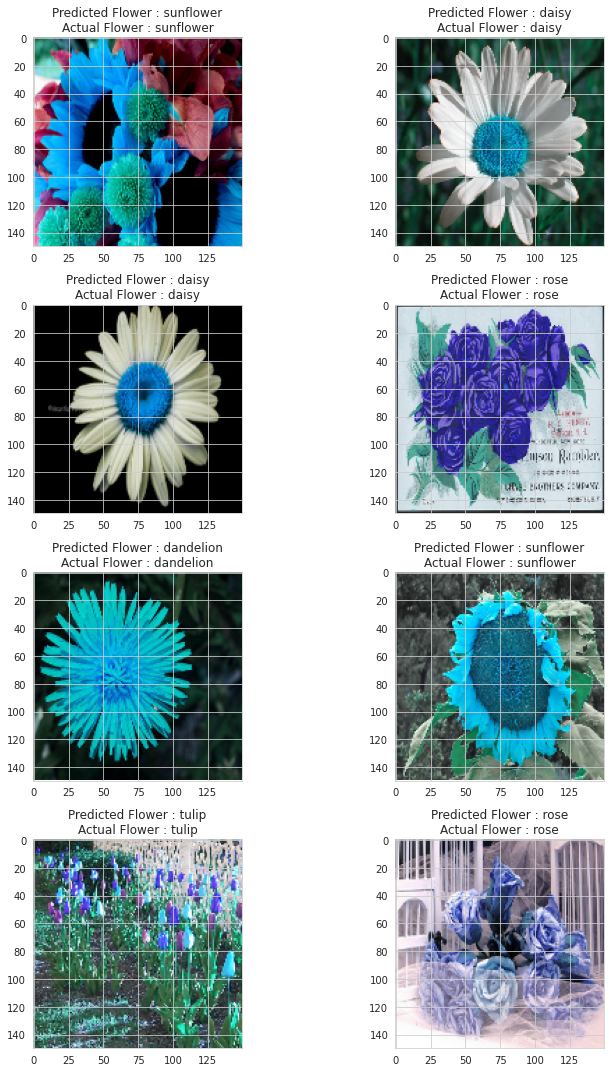

In [50]:
count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[correct_class[count]])
        ax[i,j].set_title("Predicted Flower : "+ categories[predictions[correct_class[count]]] +"\n"+"Actual Flower : "+ categories[np.argmax(y_test[correct_class[count]])])
        plt.tight_layout()
        count+=1

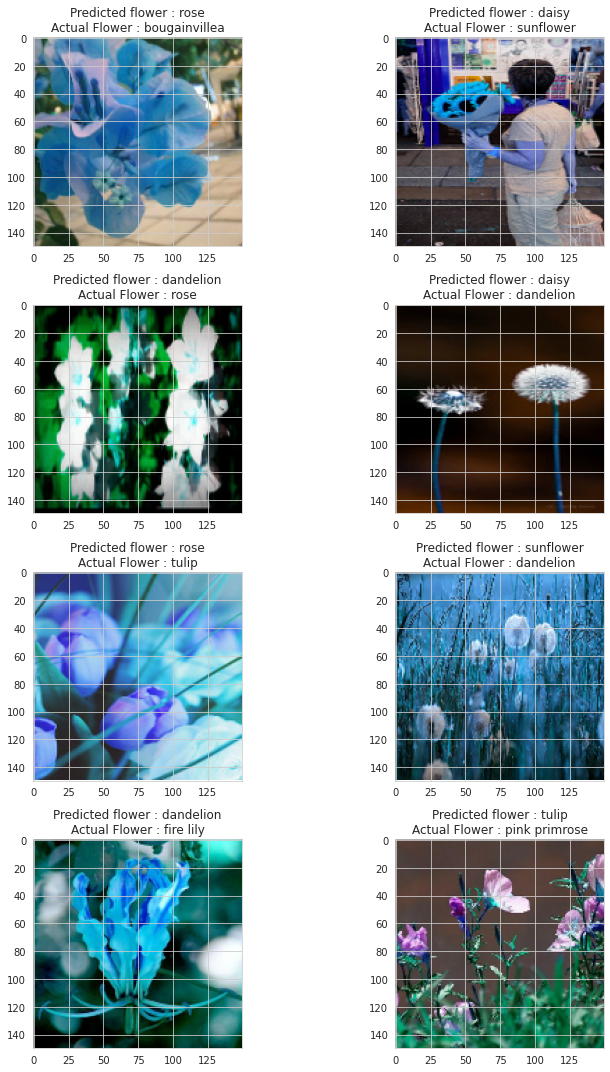

In [51]:
count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range(4):
    for j in range(2):
        ax[i,j].imshow(x_test[incorrect_class[count]])
        ax[i,j].set_title("Predicted flower : " + categories[predictions[incorrect_class[count]]] + "\n"+"Actual Flower : " +categories[np.argmax(y_test[incorrect_class[count]])])
        plt.tight_layout()
        count+=1

In [52]:
import requests
from PIL import Image
from io import BytesIO

def process_image(url):
    response=requests.get(url)
    img=Image.open(BytesIO(response.content))
    fix,ax=plt.subplots(1,3,figsize=(15,20))
    ax[0].imshow(img)
    ax[0].set_title('image')
    
    #grayscale and normalization
    img=np.array(img)
    img=cv2.cvtColor(img,cv2.IMREAD_COLOR)
    print(img.shape)
    img=img/255.0
    ax[1].imshow(img)
    ax[1].set_title('color image')
    
    #resizing
    img=cv2.resize(img,(150,150))
    print(img.shape)
    ax[2].imshow(img)
    ax[2].set_title('predicted image')
    plt.tight_layout()
    img=np.expand_dims(img,axis=0)
    #making it model ready
    
    print(img.shape)
    return img


In [53]:
def predict(url):
    img=process_image(url)
    label=model.predict(img)
    final_1=np.argmax(label,axis=1)[0]
    plt.xlabel(categories[final_1])
    return categories[final_1]

In [54]:
predict("https://media4.picsearch.com/is?LwsQDsAhRnF2IV-PP61f1fCUcQWD2jYoz6X55V_6-dg&height=266") 

(266, 341, 3)
(150, 150, 3)
(1, 150, 150, 3)


'daisy'

In [55]:
predict("https://media5.picsearch.com/is?8agnR1fAz2qzGkGmQsnFEb0nXkmuh-7hb-Il2rLLd7U&height=341")

(341, 255, 3)
(150, 150, 3)
(1, 150, 150, 3)


'tulip'

In [56]:
predict("https://www.tokeep.co.il/images/tokeep/gallery/Starr_030418-0058_Bougainvillea_spectabilis_S.jpg")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(173, 230, 3)
(150, 150, 3)
(1, 150, 150, 3)


'bougainvillea'

In [57]:
predict("https://img2.lrgarden.com/feed_pic/26/35/1000357146_1000013406_1506689507.jpg?301")

(1024, 795, 3)
(150, 150, 3)
(1, 150, 150, 3)


'rose'

In [58]:
predict("https://www.directgardening.com/9052-large_default/pink-evening-primrose.jpg")

(400, 400, 3)
(150, 150, 3)
(1, 150, 150, 3)


'pink primrose'

In [64]:
predict("https://cdn.shopify.com/s/files/1/0158/0259/7440/products/geranium_1560x.jpg?v=1546298515")

(1040, 1560, 3)
(150, 150, 3)
(1, 150, 150, 3)


'wild geranium'